In [8]:
import pandas as pd
pew = pd.read_csv('../../data/pew.csv')
print(pew)

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  \
0                  Agnostic     27       34       60       81       76   
1                   Atheist     12       27       37       52       35   
2                  Buddhist     27       21       30       34       33   
3                  Catholic    418      617      732      670      638   
4        Don’t know/refused     15       14       15       11       10   
5          Evangelical Prot    575      869     1064      982      881   
6                     Hindu      1        9        7        9       11   
7   Historically Black Prot    228      244      236      238      197   
8         Jehovah's Witness     20       27       24       24       21   
9                    Jewish     19       19       25       25       30   
10            Mainline Prot    289      495      619      655      651   
11                   Mormon     29       40       48       51       56   
12                   Muslim      6    

# Fixed one column
Pandas DataFrames have a method called `.melt()` that will reshape the dataframe into a tidy format and it takes a few parameters:
- `id_vars` : a container (list, tuple, ndarray) that represents the variables that will remain as is.
- `value_vars` :  identifies the columns you want to melt down (or unpivot). By default, it will melt all the columns not specified in the `id_vars` parameter.
- `var_name` : a string for the new column name when the `value_vars` is melted down. By default, it will be called variable.
- `value_name` : a string for the new column name that represents the values for the var_name. By default, it will be called value.

In [9]:
# we do not need to specify a value_vars since we want to pivot
# all the columns except for the 'religion' column
pew_long = pew.melt(id_vars='religion')
print(pew_long)

                  religion            variable  value
0                 Agnostic               <$10k     27
1                  Atheist               <$10k     12
2                 Buddhist               <$10k     27
3                 Catholic               <$10k    418
4       Don’t know/refused               <$10k     15
..                     ...                 ...    ...
175               Orthodox  Don't know/refused     73
176        Other Christian  Don't know/refused     18
177           Other Faiths  Don't know/refused     71
178  Other World Religions  Don't know/refused      8
179           Unaffiliated  Don't know/refused    597

[180 rows x 3 columns]


In [10]:
# we do not need to specify a value_vars since we want to pivot
# all the columns except for the 'religion' column
# We can change so that the melted columns are named
pew_long = pew.melt(id_vars='religion', var_name='income', value_name='count')
print(pew_long)

                  religion              income  count
0                 Agnostic               <$10k     27
1                  Atheist               <$10k     12
2                 Buddhist               <$10k     27
3                 Catholic               <$10k    418
4       Don’t know/refused               <$10k     15
..                     ...                 ...    ...
175               Orthodox  Don't know/refused     73
176        Other Christian  Don't know/refused     18
177           Other Faiths  Don't know/refused     71
178  Other World Religions  Don't know/refused      8
179           Unaffiliated  Don't know/refused    597

[180 rows x 3 columns]


# Fixed Multiple Columns
Not every dataset will have one columns for us to hold still while we are unpivoting. Consider the following sample

In [52]:
billboard_df = pd.read_csv('../../data/billboard.csv')
print(billboard_df)

     year            artist                    track  time date.entered  wk1  \
0    2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87   
1    2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91   
2    2000      3 Doors Down               Kryptonite  3:53   2000-04-08   81   
3    2000      3 Doors Down                    Loser  4:24   2000-10-21   76   
4    2000          504 Boyz            Wobble Wobble  3:35   2000-04-15   57   
..    ...               ...                      ...   ...          ...  ...   
312  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29   86   
313  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01   85   
314  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18   95   
315  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02   99   
316  2000   matchbox twenty                     Bent  4:12   2000-04-29   60   

      wk2   wk3   wk4   wk5  ...  wk67 

There are time when we want to visualize such data, for example, ploting weekly rating. In that case we have to melt the data, unpivot it

In [53]:
billboard_long_df=billboard_df.melt(
    id_vars=['year','artist','track','time','date.entered'],
    var_name='week',
    value_name='rating'
)

print(billboard_long_df)

       year            artist                    track  time date.entered  \
0      2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000      3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000      3 Doors Down                    Loser  4:24   2000-10-21   
4      2000          504 Boyz            Wobble Wobble  3:35   2000-04-15   
...     ...               ...                      ...   ...          ...   
24087  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29   
24088  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01   
24089  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18   
24090  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02   
24091  2000   matchbox twenty                     Bent  4:12   2000-04-29   

       week  rating  
0       wk1    87.0  
1       wk1    91.0  
2       w

Q: return a list of artist has multiple tracks on dataframe

ValueError: Could not interpret value `artist` for parameter `x`

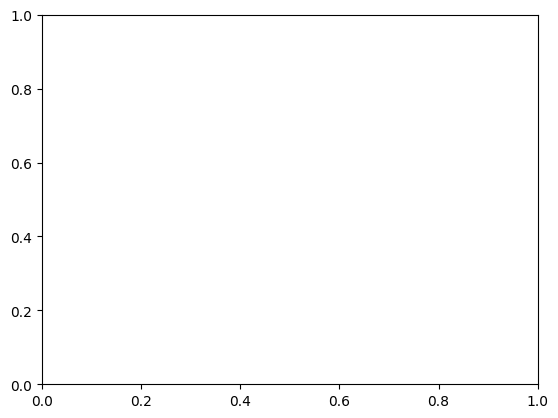

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
hist,ax = plt.subplots()
artist_freq=(billboard_long_df['artist']
             .reset_index())
sns.histplot(
    data=artist_freq,
    x='artist',
    ax=ax
)


In [89]:
#return the number of artist
billboard_long_df['artist'].nunique()
#list of artist in the data frame
artist_series = billboard_long_df['artist'].unique()

groupped_songs = billboard_long_df.groupby('artist')['week'].count().reset_index()
artist = (
    groupped_songs[groupped_songs.week > 76]['artist']
    .reset_index()
    .drop(columns='index')
    )

print(artist)

                 artist
0          3 Doors Down
1               Aaliyah
2   Aguilera, Christina
3         Anthony, Marc
4                 Avant
..                  ...
59         Thomas, Carl
60         Vassar, Phil
61     Vertical Horizon
62            Vitamin C
63         Walker, Clay

[64 rows x 1 columns]
